# Dados - Óbitos por Morbidade por Unidade de Federação

## Importação das bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Importação dos dados

In [ ]:
dados = pd.read_csv(r"e:\PÓS GRADUAÇÃO\Fase 1 - Data Analysis and Exploration\2. Análise exploratória de dados\Case - Morbidade Hospitalar do SUS\Dados - Óbitos DataSUS.csv", sep = ";", skiprows = 3, skipfooter = 6, encoding = 'ISO-8859-1')

C:\Users\Lucas Lira\AppData\Local\Temp\ipykernel_12916\543239782.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados = pd.read_csv(r"e:\PÓS GRADUAÇÃO\Fase 1 - Data Analysis and Exploration\2. Análise exploratória de dados\Case - Morbidade Hospitalar do SUS\Dados - Óbitos DataSUS.csv", sep = ";", skiprows = 3, skipfooter = 6, encoding = 'ISO-8859-1')


## Removendo a última coluna Total

In [ ]:
dados = dados.drop("Total", axis = 1)

In [ ]:
dados.head()

,Unidade da Federação,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,11 Rondônia,969,1375,2007,2189,2319,2697,3033,3093,3579,3524,3450,3523,4000,5703,3868,3906,3905,274
1,12 Acre,998,1144,1349,1543,1248,1281,1232,1512,1494,1359,1470,1543,1906,2295,1706,1786,1803,-
2,13 Amazonas,2948,3113,3175,3993,3965,3764,3144,4083,5070,5304,5785,6500,9377,11772,7516,7046,7063,708
3,14 Roraima,383,561,754,574,759,625,587,791,1078,1161,1300,1428,1666,2260,1340,1450,1122,-
4,15 Pará,7521,8541,9039,9156,9393,10080,10291,10764,11196,11671,11743,11574,14980,17704,14597,14281,14797,1118


In [ ]:
dados.tail()

,Unidade da Federação,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
22,43 Rio Grande do Sul,30427,32914,33550,32248,33041,35653,36008,36957,38697,37817,38713,39839,41623,56380,46221,42091,45342,3142
23,50 Mato Grosso do Sul,4266,5031,5675,5465,5443,5857,5735,6038,6334,6485,6515,6796,7710,11721,8819,8679,8879,704
24,51 Mato Grosso,4438,5170,5711,5787,5845,6294,6417,6738,7013,6902,6965,7210,7670,11203,6797,6979,7896,668
25,52 Goiás,7363,8677,9338,9473,9088,9924,10600,11467,11300,11195,11133,12458,15207,21826,16009,15304,15832,1273
26,53 Distrito Federal,5565,5131,4872,5652,5631,5720,5727,5713,6727,6161,6548,6651,8248,9967,7130,6963,7179,652


## Verificando as colunas

In [ ]:
dados.columns

Index(['Unidade da Federação', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', '2025'],
      dtype='object')

## Verificando a tipagem das colunas

In [ ]:
dados.dtypes

Unidade da Federação    object
2008                     int64
2009                     int64
2010                     int64
2011                     int64
2012                     int64
2013                     int64
2014                     int64
2015                     int64
2016                     int64
2017                     int64
2018                     int64
2019                     int64
2020                     int64
2021                     int64
2022                     int64
2023                     int64
2024                     int64
2025                    object
dtype: object

## Ajustando a tipagem de uma coluna object para numérico

In [ ]:
dados["2025"] = pd.to_numeric(dados["2025"], errors="coerce")
dados.dtypes

Unidade da Federação     object
2008                      int64
2009                      int64
2010                      int64
2011                      int64
2012                      int64
2013                      int64
2014                      int64
2015                      int64
2016                      int64
2017                      int64
2018                      int64
2019                      int64
2020                      int64
2021                      int64
2022                      int64
2023                      int64
2024                      int64
2025                    float64
dtype: object

## Removendo a numeração de cada unidade de federação 

In [ ]:
dados["Unidade da Federação"] = dados["Unidade da Federação"].str.replace(r'^\d+\s', '', regex=True)
print(dados["Unidade da Federação"].head())

0    Rondônia
1        Acre
2    Amazonas
3     Roraima
4        Pará
Name: Unidade da Federação, dtype: object


In [ ]:
dados.head()

,Unidade da Federação,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Rondônia,969,1375,2007,2189,2319,2697,3033,3093,3579,3524,3450,3523,4000,5703,3868,3906,3905,274.0
1,Acre,998,1144,1349,1543,1248,1281,1232,1512,1494,1359,1470,1543,1906,2295,1706,1786,1803,NaN
2,Amazonas,2948,3113,3175,3993,3965,3764,3144,4083,5070,5304,5785,6500,9377,11772,7516,7046,7063,708.0
3,Roraima,383,561,754,574,759,625,587,791,1078,1161,1300,1428,1666,2260,1340,1450,1122,NaN
4,Pará,7521,8541,9039,9156,9393,10080,10291,10764,11196,11671,11743,11574,14980,17704,14597,14281,14797,1118.0


## Quantidade de Óbitos no Brasil

In [ ]:
def sum_valor_por_ano(df):
    anos = df.columns[1:]  # Ignora a primeira coluna (Unidade da Federação)
    
    resultados = []
    
    for ano in anos:
        # Encontrar o valor máximo e a unidade da federação correspondente
        sum_valor = round(df[ano].sum())
        # Armazenando o resultado na lista
        resultados.append({'Ano': ano, 'Valor': sum_valor})
    
    # Convertendo a lista de resultados em um DataFrame
    return pd.DataFrame(resultados)

df = pd.DataFrame(dados)

# Chamando a função e armazenando o resultado em um novo DataFrame
hist_sum_obitos_ano = sum_valor_por_ano(df)

hist_sum_obitos_ano

,Ano,Valor
0,2008,352348
1,2009,387213
2,2010,410565
3,2011,418505
4,2012,421575
5,2013,440954
6,2014,449233
7,2015,475839
8,2016,495250
9,2017,491691


In [ ]:
hist_sum_obitos_ano["Ano"] = pd.to_numeric(hist_sum_obitos_ano["Ano"]) 
hist_sum_obitos_ano["Valor"] = pd.to_numeric(hist_sum_obitos_ano["Valor"]) 

Text(0.5, 1.0, 'Número de Óbitos no Brasil- Morbidade')

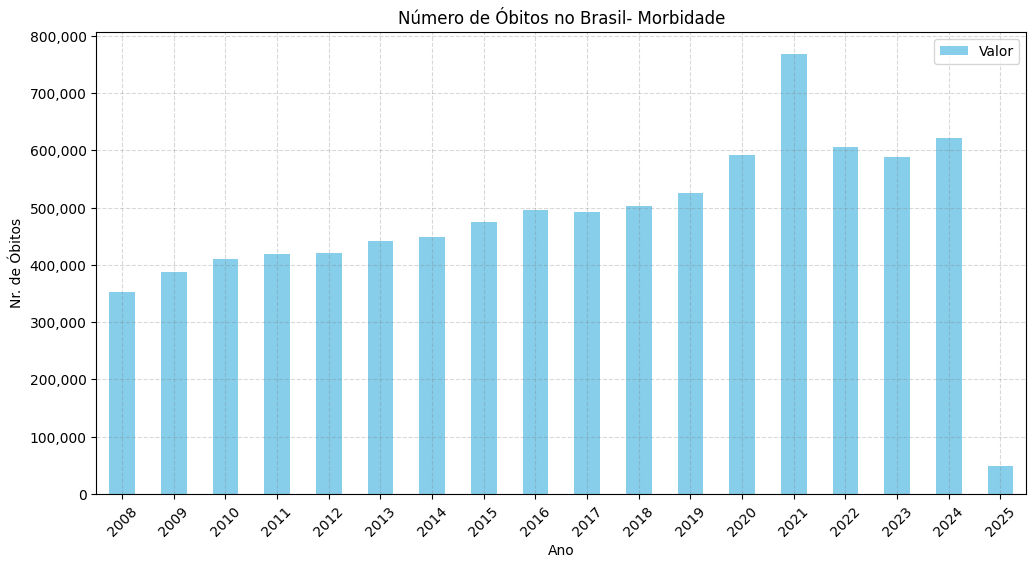

In [ ]:
ax = hist_sum_obitos_ano.plot(x = "Ano", y = "Valor", kind="bar", figsize=(12, 6), color='skyblue')

plt.grid(True, linestyle = "--", color = "gray", alpha = 0.3)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

plt.xticks(rotation=45, fontsize=10)

plt.xlabel("Ano")
plt.ylabel("Nr. de Óbitos")
plt.title("Número de Óbitos no Brasil- Morbidade")

## Unidade da Federação com maior número de Óbitos por ano

In [ ]:
def maior_valor_por_ano(df):
    anos = df.columns[1:]  # Ignora a primeira coluna (Unidade da Federação)
    
    resultados = []
    
    for ano in anos:
        # Encontrar o valor máximo e a unidade da federação correspondente
        max_valor = df[ano].max()
        unidade_max = df.loc[df[ano] == max_valor, 'Unidade da Federação'].values[0]
        # Armazenando o resultado na lista
        resultados.append({'Unidade da Federação': unidade_max, 'Ano': ano, 'Valor': max_valor})
    
    # Convertendo a lista de resultados em um DataFrame
    return pd.DataFrame(resultados)

df = pd.DataFrame(dados)

# Chamando a função e armazenando o resultado em um novo DataFrame
hist_max_obitos_ano = maior_valor_por_ano(df)

hist_max_obitos_ano

,Unidade da Federação,Ano,Valor
0,São Paulo,2008,98983.0
1,São Paulo,2009,105139.0
2,São Paulo,2010,112082.0
3,São Paulo,2011,111296.0
4,São Paulo,2012,110768.0
5,São Paulo,2013,113499.0
6,São Paulo,2014,115542.0
7,São Paulo,2015,119044.0
8,São Paulo,2016,123441.0
9,São Paulo,2017,121615.0


## Verificando a tipagem

In [ ]:
hist_max_obitos_ano.dtypes

Unidade da Federação     object
Ano                      object
Valor                   float64
dtype: object

## Ajustando para numérico

In [ ]:
hist_max_obitos_ano["Ano"] = pd.to_numeric(hist_max_obitos_ano["Ano"]) 
hist_max_obitos_ano["Valor"] = pd.to_numeric(hist_max_obitos_ano["Valor"]) 

## Plotando essa visão em gráfico de linhas

Text(0.5, 1.0, 'Federação Com Maior Número de Óbitos - Morbidade')

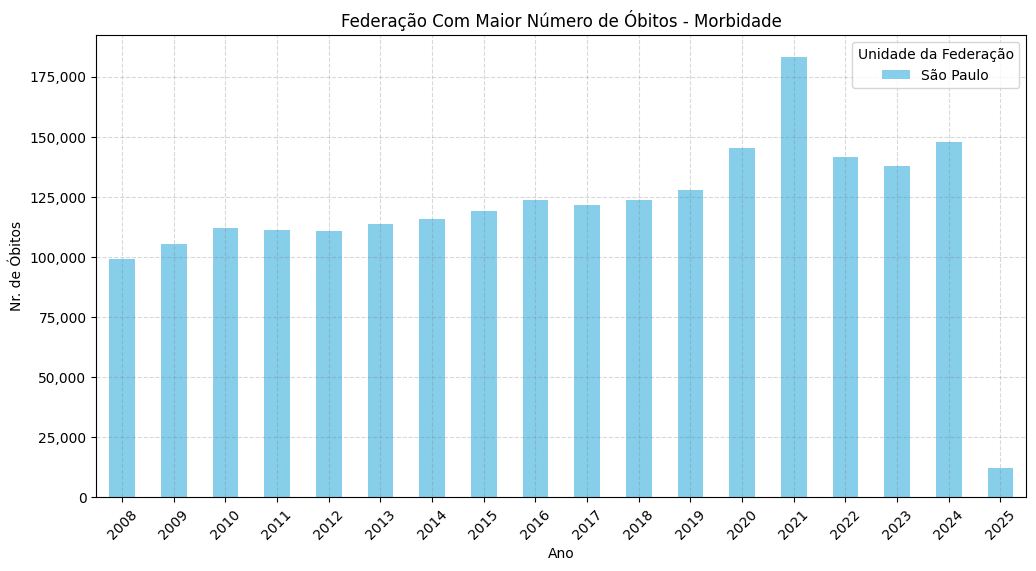

In [ ]:
ax = hist_max_obitos_ano.pivot_table(index="Ano", columns="Unidade da Federação", values="Valor", aggfunc="max").plot(kind="bar", figsize=(12, 6), color='skyblue')

plt.grid(True, linestyle = "--", color = "gray", alpha = 0.3)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

plt.xticks(rotation=45, fontsize=10)

plt.ylabel("Nr. de Óbitos")
plt.title("Federação Com Maior Número de Óbitos - Morbidade")


## Unidade da Federação com menor número de Óbitos por ano

In [ ]:
def menor_valor_por_ano(df):
    anos = df.columns[1:]  # Ignora a primeira coluna (Unidade da Federação)
    
    resultados = []
    
    for ano in anos:
        # Encontrar o valor máximo e a unidade da federação correspondente
        min_valor = df[ano].min()
        unidade_min = df.loc[df[ano] == min_valor, 'Unidade da Federação'].values[0]
        # Armazenando o resultado na lista
        resultados.append({'Unidade da Federação': unidade_min, 'Ano': ano, 'Valor': min_valor})
    
    # Convertendo a lista de resultados em um DataFrame
    return pd.DataFrame(resultados)

df = pd.DataFrame(dados)

# Chamando a função e armazenando o resultado em um novo DataFrame
hist_min_obitos_ano = menor_valor_por_ano(df)

hist_min_obitos_ano

,Unidade da Federação,Ano,Valor
0,Roraima,2008,383.0
1,Roraima,2009,561.0
2,Roraima,2010,754.0
3,Roraima,2011,574.0
4,Roraima,2012,759.0
5,Roraima,2013,625.0
6,Roraima,2014,587.0
7,Roraima,2015,791.0
8,Amapá,2016,900.0
9,Amapá,2017,863.0


In [ ]:
hist_min_obitos_ano.dtypes

Unidade da Federação     object
Ano                      object
Valor                   float64
dtype: object

In [ ]:
hist_min_obitos_ano["Ano"] = pd.to_numeric(hist_min_obitos_ano["Ano"]) 
hist_min_obitos_ano["Valor"] = pd.to_numeric(hist_min_obitos_ano["Valor"]) 

Text(0.5, 1.0, 'Federação com Menor Número de Óbitos - Morbidade')

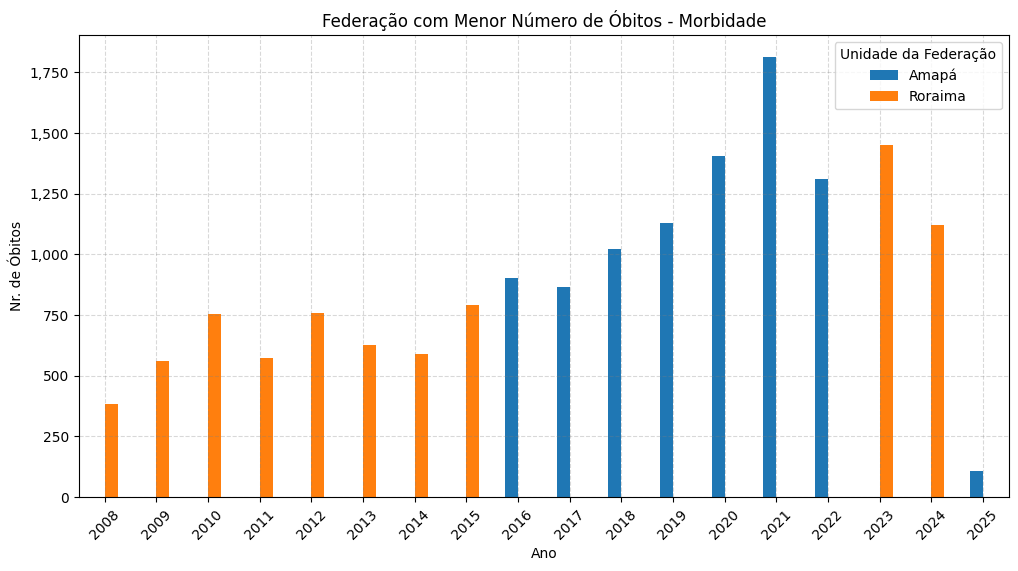

In [ ]:
ax = hist_min_obitos_ano.pivot_table(index="Ano", columns="Unidade da Federação", values="Valor", aggfunc="max").plot(kind="bar", figsize=(12, 6))

plt.grid(True, linestyle = "--", color = "gray", alpha = 0.3)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

plt.xticks(rotation=45, fontsize=10)

plt.xlabel("Ano")
plt.ylabel("Nr. de Óbitos")
plt.title("Federação com Menor Número de Óbitos - Morbidade")


## Visto que São Paulo tem o maior número de Óbitos, o quanto São Paulo representa desses casos do Brasil 

In [ ]:
def representatividade_sp(df):
    anos = df.columns[1:]  # Ignora a primeira coluna (Unidade da Federação)
    
    resultados = []
    
    for ano in anos:
        # Encontrar o valor máximo e a unidade da federação correspondente
        sum = df[ano].sum()
        max = df[ano].max()
        porc = (f"{round(max/sum * 100, 2)} %")
        # Armazenando o resultado na lista
        resultados.append({'Ano': ano, 'Valor': porc})
    
    # Convertendo a lista de resultados em um DataFrame
    return pd.DataFrame(resultados)

df = pd.DataFrame(dados)

# Chamando a função e armazenando o resultado em um novo DataFrame
hist_perc_obitos_ano = representatividade_sp(df)

hist_perc_obitos_ano

,Ano,Valor
0,2008,28.09 %
1,2009,27.15 %
2,2010,27.3 %
3,2011,26.59 %
4,2012,26.27 %
5,2013,25.74 %
6,2014,25.72 %
7,2015,25.02 %
8,2016,24.92 %
9,2017,24.73 %
